In [23]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr

In [24]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
#Check for empty spots
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


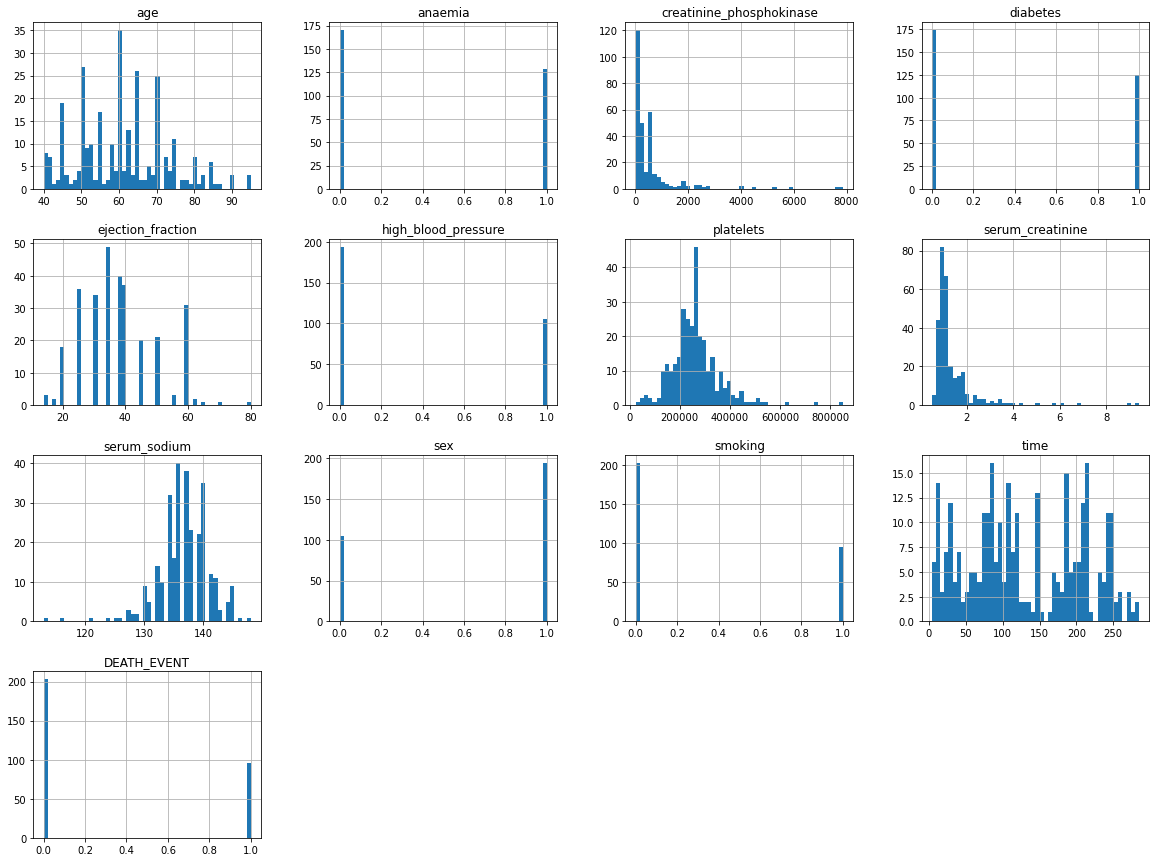

In [26]:
heart_df.hist(bins=50, figsize=(20,15))
plt.show()

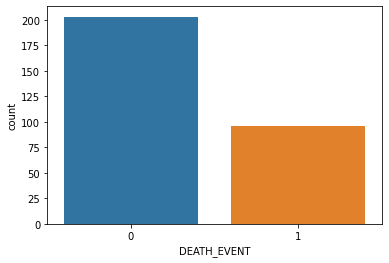

In [43]:
#"Death_Event" represents if the patient died during the follow up period.
#0 = living | 1 = deceased

death = heart_df['DEATH_EVENT']
sns.countplot(x=death)
plt.show()

In [44]:
# Male patients that encountered a death event
male_death = heart_df[(heart_df['sex'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_male_deaths = len(male_death)
print(f"The number of males that had a death event: {num_male_deaths}")

The number of males that had a death event: 62


In [45]:
# Female patients that encountered a death event
female_death = heart_df[(heart_df['sex'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_female_deaths = len(female_death)
print(f"The number of females that had a death event: {num_female_deaths}")

The number of females that had a death event: 34


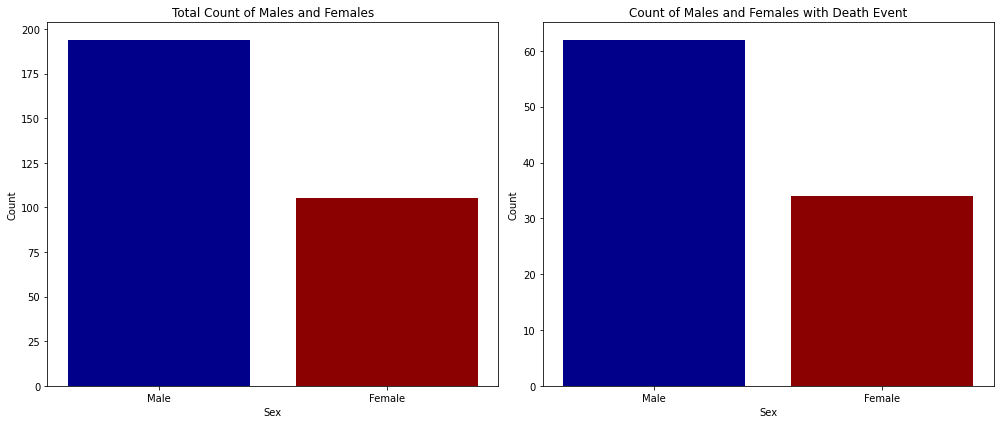

In [41]:
#Count total males and females
sex_counts = heart_df['sex'].value_counts().rename_axis('sex').reset_index(name='total_count')

#Count males and females with death events
death_event_counts = heart_df[heart_df['DEATH_EVENT'] == 1]['sex'].value_counts().rename_axis('sex').reset_index(name='death_event_count')

# Replace numeric sex values with labels
sex_counts['sex'] = sex_counts['sex'].replace({1: 'Male', 0: 'Female'})
death_event_counts['sex'] = death_event_counts['sex'].replace({1: 'Male', 0: 'Female'})

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar plot for total counts
axes[0].bar(sex_counts['sex'], sex_counts['total_count'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Males and Females')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Bar plot for death event counts
axes[1].bar(death_event_counts['sex'], death_event_counts['death_event_count'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of Males and Females with Death Event')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
## update 